In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

# 資料作成に使用する最もフィットするモデルはどれかを示すための表・グラフを作るためのプログラム

# 資料素材を早急に作成するためにコードはめちゃくちゃなのでlib.ipynbに入れてはいけない

# 今回作成したかったものと同様の表を作りたい場合は新規で作り直す

cg
ep
lu


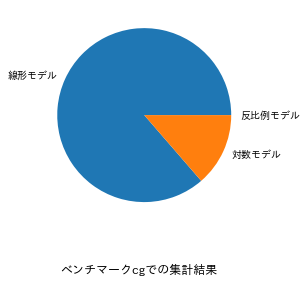

In [ ]:
csv_directory_path = './tmp_GenerateResources/'
result_label = ["線形モデル", "対数モデル", "反比例モデル"]
result_of_all = [0, 0, 0]
list_for_csv = []

# 第一引数として渡されたリストの値の合計値に対する割合を算出する。
# 第二引数として渡された文字列を返り値のリストの先頭に入れる。
# 上記2行での処理をまとめたリストを返す関数。
# 要素として入れられる値の小数点以下は切り捨てられる。
def return_ratio_list(target_list, row_name):
    summarised_num = sum(target_list)
    return_list = []
    return_list.append(row_name)
    for num in target_list:
        return_list.append(math.floor(num/summarised_num * 100000)/1000)
    return(return_list)

for benchmark in benchmarks:
    result_of_benchmark = [0, 0, 0]
    file_name = benchmark+'.csv'
    file_path = csv_directory_path+file_name
    if(os.path.isfile(csv_directory_path+file_name) == False):
        continue
    # 完全に値をとれたもののみで集計するようにしている
    if(benchmark != "cg" and benchmark != "ep" and benchmark != "lu"):
        continue
    
    print(benchmark)
    df = pd.read_csv(file_path, index_col=0)
#     print(df)
    columns = df.columns.values
    indices = df.index.values
    for index in indices:
        row = df.loc[index].tolist()
        result_of_benchmark[row.index(min(row))] += 1
        result_of_all[row.index(min(row))] += 1
    plt.figure()
    plt.pie(result_of_benchmark, labels=result_label)
    plt.suptitle("ベンチマーク"+benchmark+"での集計結果", y=-0.01)
    # ベンチマークごとの結果(%)をCSV化用のデータフレームに追加
    list_for_csv.append(return_ratio_list(result_of_benchmark, benchmark))

In [ ]:
# 全体の結果(%)をCSV化用のデータフレームに追加
list_for_csv.append(return_ratio_list(result_of_all, "全体"))

# 全体での集計結果をまとめた円グラフの出力
plt.figure()
plt.pie(result_of_all, labels=result_label)
plt.suptitle("全体での集計結果", y=-0.01)

In [ ]:
list_for_csv_append = []

for benchmark in benchmarks:
    
    ### メモ：↓の処理は固定
    file_name = benchmark+'.csv'
    file_path = csv_directory_path+file_name
    # 対称としたいファイルが無ければ処理を飛ばす
    if(os.path.isfile(csv_directory_path+file_name) == False):
        continue
    # 完全に値をとれたもののみで集計するようにしている
    if(benchmark != "cg" and benchmark != "ep" and benchmark != "lu"):
        continue
    ### メモ：↑の処理は固定
    
    print(benchmark)
    
    ### 各ベンチマークのMAPE表を読み込む
    df = pd.read_csv(file_path, index_col=0)
#     print(df)
    ### ベンチマークのMAPE表の行名と列名のリストを取得
    columns = df.columns.values
    indices = df.index.values
    cell_append_AtBenchmark = [benchmark]
    for column in columns:
        sampling_column = df.T.loc[column].values
#         print(f"{benchmark}, {column}")
        min_data_AtBenchmark = math.floor(min(sampling_column) * 100)/100
        max_data_AtBenchmark = math.floor(max(sampling_column) * 100)/100
        cell_append_AtBenchmark.append(f"({min_data_AtBenchmark}-{max_data_AtBenchmark})")
    list_for_csv_append.append(cell_append_AtBenchmark)
print(list_for_csv_append)

In [ ]:
### 全体での集計を行う

### cell_append_AtAllに全体での(min-max)を入れる
cell_append_AtAll = ""
list_all = []
for benchmark in benchmarks:
    ### メモ：↓の処理は固定
    file_name = benchmark+'.csv'
    file_path = csv_directory_path+file_name
    # 対称としたいファイルが無ければ処理を飛ばす
    if(os.path.isfile(csv_directory_path+file_name) == False):
        continue
    # 完全に値をとれたもののみで集計するようにしている
    if(benchmark != "cg" and benchmark != "ep" and benchmark != "lu"):
        continue
    ### メモ：↑の処理は固定
    
    list_all.append(pd.read_csv(file_path, index_col=0))
    
df_all = pd.concat(list_all, axis=0)

columns_all = df_all.columns.values
cell_append_AtAll = ["全体"]
for column in columns_all:
    sampling_column = df_all.T.loc[column].values
    min_data_AtAll = math.floor(min(sampling_column) * 100)/100
    max_data_AtAll = math.floor(max(sampling_column) * 100)/100
    cell_append_AtAll.append(f"({min_data_AtAll}-{max_data_AtAll})")
list_for_csv_append.append(cell_append_AtAll)

print(list_for_csv_append)
df_all

In [ ]:
### ここで提出時に元データであった「list_for_csv」と、提出後のレビューで追加申請があった「list_for_csv_append」を結合する。
### 破壊的な処理になってしまうが元コードを流用するためにlist_for_csvとlist_for_csv_appendを結合したものをlist_for_csvとする。
print(list_for_csv)
for i in range(0,4):
    for j in range(1,4):
        print(f"i = {i}, j = {j}")
        print(list_for_csv[i][j])
        list_for_csv[i][j] = f"{list_for_csv[i][j]}{list_for_csv_append[i][j]}"

In [ ]:
# 結果をCSV化するためのDataFrameに関する処理
list_for_csv_df = pd.DataFrame(list_for_csv)
list_for_csv_df.columns = [""] + result_label
list_for_csv_df.set_index("", inplace=True)
## 作成したデータフレームをプリント出力
print(list_for_csv_df)
## 作成したデータフレームをCSVとして保存
list_for_csv_df.to_csv("./tmp_GenerateResources/calced_table.csv")